In [1]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

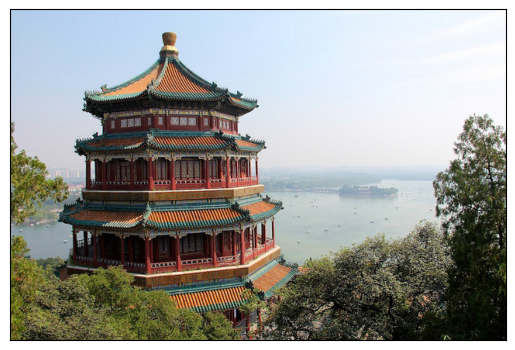

In [7]:
from sklearn.datasets import load_sample_image
building = load_sample_image("china.jpg")
ax = plt.axes(xticks=[],yticks=[])
ax.imshow(building)

In [9]:
building.shape

(427, 640, 3)

In [11]:
building

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]

In [23]:
data = building/255
data = data.reshape(427*640,3)
data.shape

(273280, 3)

In [25]:
colors = data
rng = np.random.RandomState(0) 
i = rng.permutation(data.shape[0])[:10000]
colors = colors[i]
colors

array([[0.92156863, 0.9254902 , 0.94509804],
       [0.37647059, 0.37647059, 0.14117647],
       [0.48235294, 0.42745098, 0.41568627],
       ...,
       [0.97647059, 0.98039216, 0.99607843],
       [0.62352941, 0.78039216, 0.7372549 ],
       [0.86666667, 0.93333333, 0.99607843]])

In [27]:
def plot_pixels(data,title,colors=None, N=10000):
    if colors is None:
        colors = data
    rng = np.random.RandomState(0) 
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G,B =data[i].T

    fig , ax = plt.subplots(1,2,figsize = (16,6))
    ax[0].scatter(R, G, color = colors,marker = '.')
    ax[0].set(xlabel = 'Red',ylabel = 'Green',xlim=(0,1),ylim= (0,1))

    ax[1].scatter(R,B,color=colors, marker='.')
    ax[1].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim=(0,1))
    fig.suptitle(title,size=20);

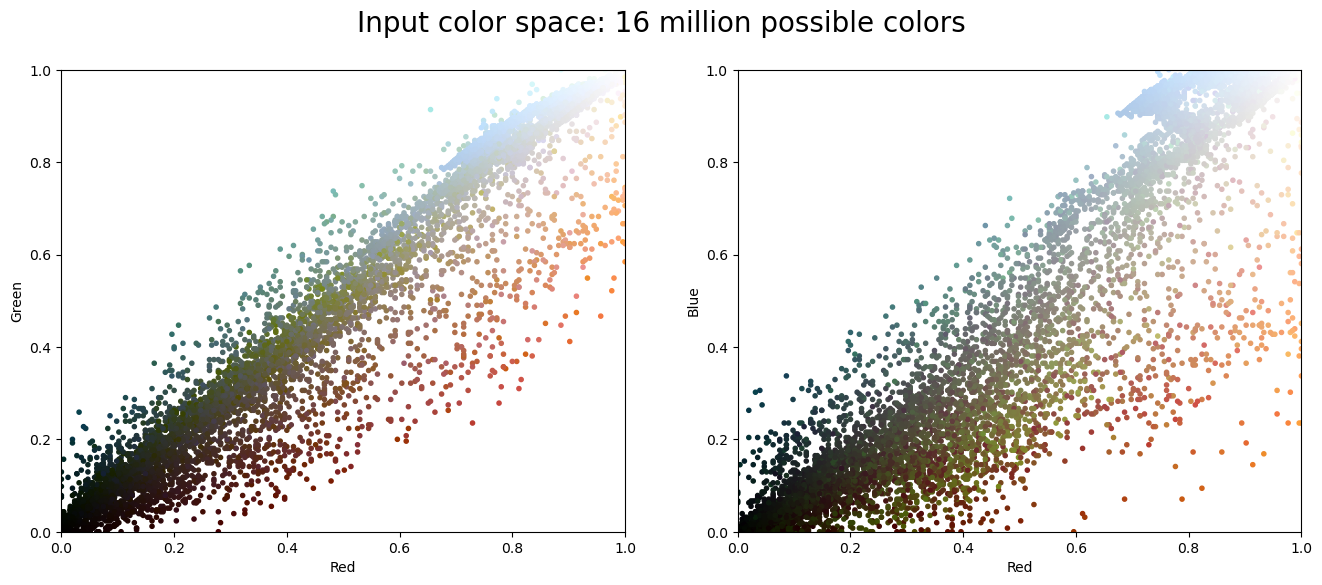

In [29]:
plot_pixels(data,title = 'Input color space: 16 million possible colors')

C:\Users\nk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


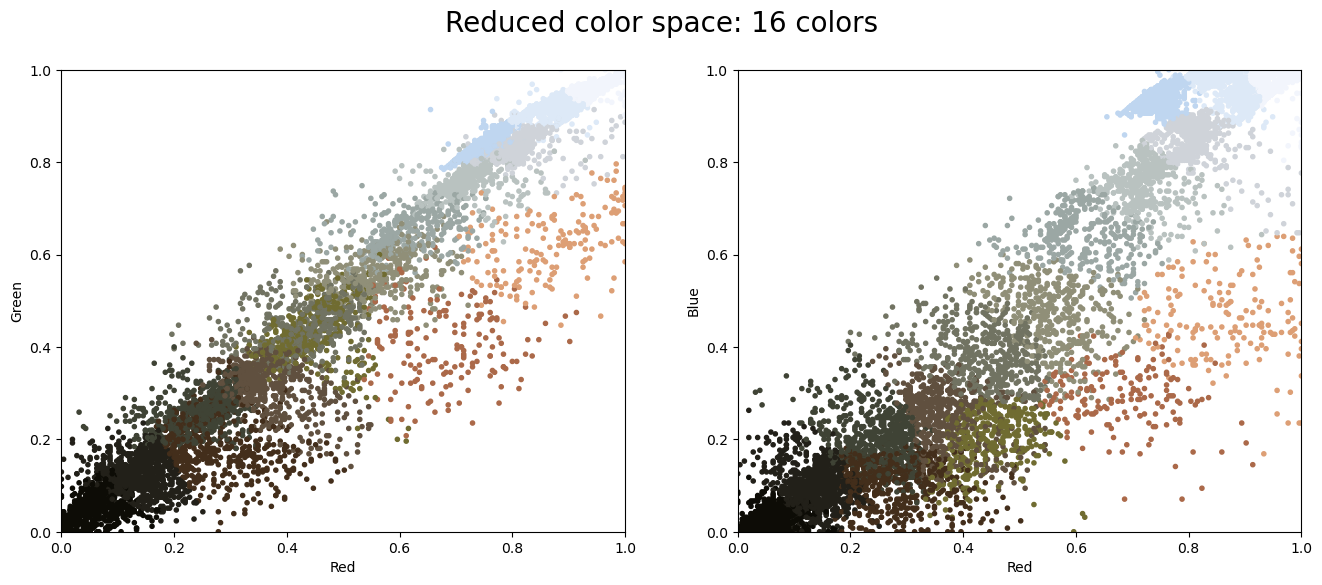

In [31]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data,colors = new_colors, title = 'Reduced color space: 16 colors')

Text(0.5, 1.0, '16-color Image')

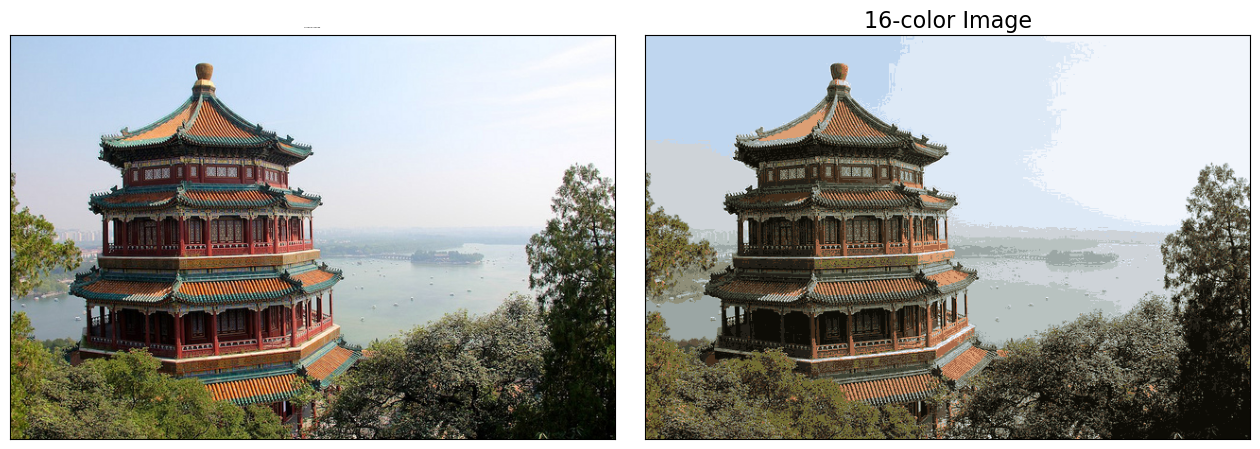

In [33]:
building_recolored = new_colors.reshape(building.shape)
fig, ax = plt.subplots(1,2,figsize=(16,6), subplot_kw =dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace =0.05)
ax[0].imshow(building)
ax[0].set_title('Original Image', size = 1.6)
ax[1].imshow(building_recolored)
ax[1].set_title('16-color Image', size= 16)